# **Deep Learning Class 5**

##  Imbalanced Multiclass Classification
##  The data is from the last class (Musical Dataset)
## Bachelor's Degree program in Data Science Year 2023/2024

Authors of the notebook

Mauro Castelli (mcastelli@novaims.unl.pt)

Yuriy Perezhohin (yperezhohin@novaims.unl.pt)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from keras.layers import Dropout

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Open the dataset as always

In [3]:
dataset= pd.read_csv("/content/drive/MyDrive/musicalDataProcessed.csv")


In [4]:
dataset 
#sss

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
1,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
2,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
3,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
4,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
11809,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
11810,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
11811,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8




## The dataset is imbalanced and there are some preacutions to take into consideration when compiling the model.

In [5]:
dataset["Class"].value_counts()

10    3374
6     2039
8     1523
9     1099
1     1037
2      956
5      517
7      464
0      386
3      270
4      148
Name: Class, dtype: int64

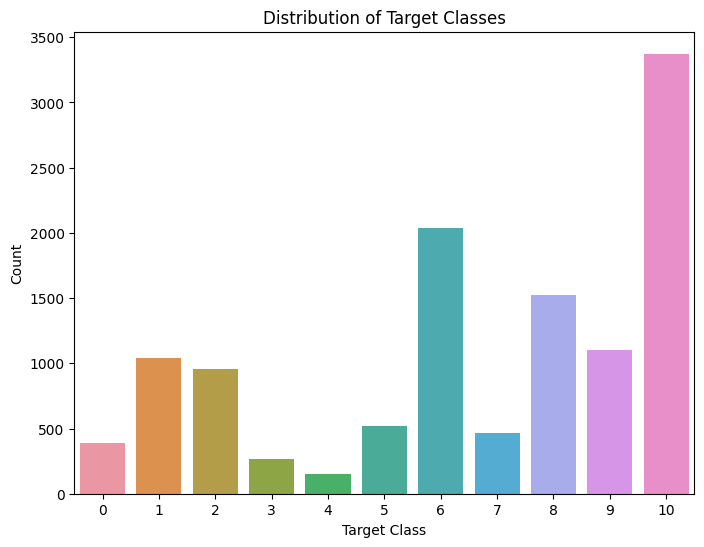

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data= dataset, x='Class')
plt.title('Distribution of Target Classes')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

## This dataset consists of 11813 rows which are classified into  11 classes
1. Class 0: 386 examples
2. Class 1: 1037 examples
3. Class 2: 956 examples
4. Class 3: 270 examples
5. Class 4: 148 examples
6. Class 5: 517 examples
7. Class 6: 2039 examples
8. Class 7: 464 examples
9. Class 8: 1523 examples
10. Class 9: 1099 examples
11. Class 10: 3374 examples



## First of all split the data and apply the scaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1], test_size= 0.2, shuffle= True)

In [8]:
X_train

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
3175,43.0,0.425,0.0863,5.0,-15.163,1,0.0357,0.962000,0.006150,0.1240,0.3620,154.328,194013.000000,4
3264,48.0,0.323,0.1180,5.0,-22.751,0,0.0449,0.195000,0.694000,0.2410,0.0747,79.554,4.081117,4
1087,44.0,0.543,0.8910,11.0,-7.084,1,0.0431,0.000262,0.000386,0.1650,0.3930,142.633,241573.000000,4
9462,52.0,0.835,0.5230,3.0,-7.227,0,0.0459,0.005360,0.137000,0.1570,0.5880,100.026,167613.000000,4
8433,41.0,0.647,0.7870,5.0,-7.476,1,0.0255,0.000430,0.002470,0.1050,0.3930,125.111,252747.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,53.0,0.356,0.6090,7.0,-14.697,1,0.0514,0.000011,0.878000,0.1000,0.0952,128.432,319160.000000,4
6092,37.0,0.417,0.9320,5.0,-4.096,0,0.0579,0.000221,0.000091,0.4120,0.1840,79.998,226600.000000,4
4251,3.0,0.660,0.4850,2.0,-8.101,1,0.0258,0.244000,0.010200,0.0585,0.8280,99.828,302520.000000,4
4146,64.0,0.215,0.2630,11.0,-14.416,1,0.0378,0.947000,0.000280,0.0919,0.3070,172.332,232373.000000,4


In [9]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

9450
2363
9450
2363


## The columns that are all continuous and numerical are all beside the last one.

In [10]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X_train.iloc[:, :13])
X_train.iloc[:, :13] = scaled_data
scaled_test_data= scaler.transform(X_test.iloc[:, :13])
X_test.iloc[:, :13] = scaled_test_data
X_train

<ipython-input-10-58429c77a53c>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.iloc[:, :13] = scaled_data
<ipython-input-10-58429c77a53c>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.iloc[:, :13] = scaled_test_data


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
3175,0.432990,0.389875,0.086281,0.4,0.560329,1.0,0.014466,0.965863,0.006174,0.114376,0.357388,0.662376,0.137359,4
3264,0.484536,0.279533,0.117982,0.4,0.358354,0.0,0.024548,0.195783,0.696787,0.233752,0.058646,0.262214,0.000003,4
1087,0.443299,0.517525,0.890998,1.0,0.775373,1.0,0.022575,0.000263,0.000387,0.156209,0.389623,0.599789,0.171031,4
9462,0.525773,0.833405,0.522990,0.2,0.771567,0.0,0.025644,0.005382,0.137549,0.148046,0.592388,0.371772,0.118668,4
8433,0.412371,0.630030,0.786996,0.4,0.764939,1.0,0.003288,0.000432,0.002479,0.094990,0.389623,0.506018,0.178942,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0.536082,0.315232,0.608992,0.6,0.572733,1.0,0.031671,0.000011,0.881526,0.089889,0.079963,0.523791,0.225962,4
6092,0.371134,0.381220,0.931999,0.4,0.854907,0.0,0.038795,0.000222,0.000091,0.408224,0.172299,0.264590,0.160430,4
4251,0.020619,0.644093,0.484990,0.1,0.748303,1.0,0.003616,0.244980,0.010240,0.047546,0.841947,0.370713,0.214181,4
4146,0.649485,0.162700,0.262985,1.0,0.580212,1.0,0.016767,0.950803,0.000280,0.081624,0.300198,0.758727,0.164517,4


## Finally Encode the last column

In [11]:
ct = ColumnTransformer([("oneHot", OneHotEncoder(drop="first"), [13])], remainder="passthrough")
X_train = ct.fit_transform(X_train)
X_test= ct.fit_transform(X_test)

## To balance the training phase it is possible to create specific weights for each class. This means that the classes with lower number of samples will have higher weight.

## The formula to calculate the weight for each class is defined by:
### $w_i$ = $\frac{n_{samples}}{n_{classes} * count_i}$

### You take the whole number of samples and divide it by number of classes times the count of samples of this class

In [12]:
y_train.value_counts()

10    2685
6     1638
8     1206
9      869
1      849
2      759
5      414
7      382
0      308
3      216
4      124
Name: Class, dtype: int64

In [13]:
# Compute class weights to address class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 2.7892561983471076,
 1: 1.0118856408609058,
 2: 1.1318720804886813,
 3: 3.977272727272727,
 4: 6.928152492668621,
 5: 2.075098814229249,
 6: 0.5244755244755245,
 7: 2.2489290813898144,
 8: 0.7123473541383989,
 9: 0.9885971335913799,
 10: 0.31995937023869986}

## Split the train dataset into a validation split
### The F1 score metric was deleted from tensorflow and keras in the new version of 2.0. So in the end we should calculate F1 score in the end by ourselfs

In [14]:
print(len(X_train))

9450


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.25, shuffle= True)
print(len(X_val))
print(len(y_val))

2363
2363


In [16]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 86, 231, 191,  47,  30,  99, 406,  92, 319, 212, 650]))

## Convert to tensors

In [17]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

## Lets build two models, one taking into consideration that the data is imbalanced and other not.


## When dealing with imbalanced datasets we could not just look into accuracy as the model could just overfit the higher classes. Even if we assigned the weights to each classes, it is worth paying attention to the F1 score.
<img src= https://inside-machinelearning.com/wp-content/uploads/2021/09/F1-Score.png width=450>

## Small example to understand better how this metric works
### You have 100 emails and 30 of them are spams. Your model have predicted 20 emails that are spam correctly and 10 wrong.
### Your precision is = 20/(20(correctly predicted) + 10 (Number of non-spam emails incorrectly classified as spam)) = 0.67
### Your recall is = 20(20 (correctly predicted) + 10 (Number of actual spam emails that the model missed)) =0.67
### Then your F1 score is = $2 \times \frac{(0.67 \times 0.67)}{0.67 + 0.67}$ = 0.67

## Keras does not accept F1 metric as predefined function, it was disabled before the keras 2.0. So now you need to build your own custom F1 function to input into the metrics parameter.

## You also need to specify in the compile method run_eagrly=True.
### This will allow any computations out of the tensor wrappers

In [18]:

# Build the neural network model
model = keras.Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    validation_data=[X_val,y_val],
    epochs=20,
    batch_size=10,
    class_weight=class_weights_dict
)


Epoch 1/20
709/709 [==============================] - 8s 4ms/step - loss: 2.0296 - accuracy: 0.2689 - val_loss: 1.9394 - val_accuracy: 0.2920
Epoch 2/20
709/709 [==============================] - 3s 4ms/step - loss: 1.6196 - accuracy: 0.3482 - val_loss: 1.6899 - val_accuracy: 0.3898
Epoch 3/20
709/709 [==============================] - 3s 4ms/step - loss: 1.4343 - accuracy: 0.3875 - val_loss: 1.6234 - val_accuracy: 0.3995
Epoch 4/20
709/709 [==============================] - 3s 4ms/step - loss: 1.3355 - accuracy: 0.4071 - val_loss: 1.5714 - val_accuracy: 0.3847
Epoch 5/20
709/709 [==============================] - 3s 4ms/step - loss: 1.2776 - accuracy: 0.4106 - val_loss: 1.5076 - val_accuracy: 0.4211
Epoch 6/20
709/709 [==============================] - 3s 4ms/step - loss: 1.2514 - accuracy: 0.4174 - val_loss: 1.4645 - val_accuracy: 0.4499
Epoch 7/20
709/709 [==============================] - 3s 4ms/step - loss: 1.2336 - accuracy: 0.4230 - val_loss: 1.4751 - val_accuracy: 0.4393
Epoch 

In [19]:
y_train_predicted = model.predict(X_train)
y_train_predicted= np.argmax(y_train_predicted,axis=1)
y_val_predicted= model.predict(X_val)
y_val_predicted= np.argmax(y_val_predicted,axis=1)


74/74 [==============================] - 0s 1ms/step



### Macro average computes f1 for each label, and returns the average without considering the proportion for each label in the dataset. weighted average computes f1 for each label, and returns the average considering the proportion for each label in the dataset.


In [20]:
print(classification_report(y_train.numpy(), y_train_predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.52      0.62       222
         1.0       0.18      0.19      0.18       618
         2.0       0.27      0.74      0.40       568
         3.0       0.62      0.85      0.72       169
         4.0       0.34      0.84      0.48        94
         5.0       0.48      0.56      0.52       315
         6.0       0.49      0.16      0.24      1232
         7.0       0.92      0.90      0.91       290
         8.0       0.48      0.72      0.58       887
         9.0       0.30      0.42      0.35       657
        10.0       0.51      0.25      0.34      2035

    accuracy                           0.41      7087
   macro avg       0.49      0.56      0.48      7087
weighted avg       0.46      0.41      0.39      7087



In [21]:
print(classification_report(y_val.numpy(), y_val_predicted))

              precision    recall  f1-score   support

         0.0       0.67      0.42      0.51        86
         1.0       0.22      0.19      0.21       231
         2.0       0.29      0.78      0.42       191
         3.0       0.48      0.87      0.62        47
         4.0       0.38      0.83      0.53        30
         5.0       0.45      0.60      0.51        99
         6.0       0.50      0.17      0.26       406
         7.0       0.97      0.92      0.94        92
         8.0       0.52      0.70      0.60       319
         9.0       0.26      0.38      0.31       212
        10.0       0.53      0.27      0.36       650

    accuracy                           0.42      2363
   macro avg       0.48      0.56      0.48      2363
weighted avg       0.47      0.42      0.40      2363



## Apply the same process to the test set

In [22]:
y_test_predicted = model.predict(X_test)
y_test_predicted= np.argmax(y_test_predicted,axis=1)
print(classification_report(y_test.numpy(), y_test_predicted))

74/74 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.80      0.55      0.65        78
         1.0       0.15      0.19      0.17       188
         2.0       0.29      0.77      0.42       197
         3.0       0.55      0.80      0.65        54
         4.0       0.29      0.75      0.42        24
         5.0       0.49      0.52      0.50       103
         6.0       0.47      0.16      0.24       401
         7.0       0.91      0.91      0.91        82
         8.0       0.51      0.67      0.58       317
         9.0       0.34      0.46      0.39       230
        10.0       0.52      0.27      0.35       689

    accuracy                           0.42      2363
   macro avg       0.48      0.55      0.48      2363
weighted avg       0.46      0.42      0.40      2363



## Now disable the class_weight and run the model

In [23]:
# Build the neural network model
model = keras.Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# Train the model without class weights
history = model.fit(
    X_train, y_train,
    validation_data=[X_val,y_val],
    epochs=20,
    batch_size=10,
)


Epoch 1/20
709/709 [==============================] - 4s 4ms/step - loss: 1.8240 - accuracy: 0.3444 - val_loss: 1.6619 - val_accuracy: 0.3855
Epoch 2/20
709/709 [==============================] - 3s 4ms/step - loss: 1.6074 - accuracy: 0.4074 - val_loss: 1.5718 - val_accuracy: 0.4304
Epoch 3/20
709/709 [==============================] - 3s 4ms/step - loss: 1.5255 - accuracy: 0.4359 - val_loss: 1.5060 - val_accuracy: 0.4490
Epoch 4/20
709/709 [==============================] - 3s 4ms/step - loss: 1.4690 - accuracy: 0.4572 - val_loss: 1.4313 - val_accuracy: 0.4680
Epoch 5/20
709/709 [==============================] - 3s 4ms/step - loss: 1.4279 - accuracy: 0.4682 - val_loss: 1.4363 - val_accuracy: 0.4596
Epoch 6/20
709/709 [==============================] - 2s 3ms/step - loss: 1.4014 - accuracy: 0.4707 - val_loss: 1.3854 - val_accuracy: 0.4702
Epoch 7/20
709/709 [==============================] - 3s 4ms/step - loss: 1.3853 - accuracy: 0.4755 - val_loss: 1.3648 - val_accuracy: 0.4791
Epoch 

## Repeat the process and verify the values

In [24]:
y_train_predicted = model.predict(X_train)
y_train_predicted= np.argmax(y_train_predicted,axis=1)
y_val_predicted= model.predict(X_val)
y_val_predicted= np.argmax(y_val_predicted,axis=1)

74/74 [==============================] - 0s 2ms/step


In [25]:
print(classification_report(y_train.numpy(), y_train_predicted))

              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70       222
         1.0       0.00      0.00      0.00       618
         2.0       0.61      0.32      0.42       568
         3.0       0.75      0.79      0.77       169
         4.0       0.47      0.70      0.57        94
         5.0       0.51      0.56      0.53       315
         6.0       0.46      0.30      0.36      1232
         7.0       0.92      0.92      0.92       290
         8.0       0.53      0.65      0.59       887
         9.0       0.43      0.27      0.33       657
        10.0       0.43      0.71      0.54      2035

    accuracy                           0.50      7087
   macro avg       0.53      0.54      0.52      7087
weighted avg       0.47      0.50      0.46      7087



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print(classification_report(y_val.numpy(), y_val_predicted))

              precision    recall  f1-score   support

         0.0       0.70      0.57      0.63        86
         1.0       0.00      0.00      0.00       231
         2.0       0.56      0.31      0.40       191
         3.0       0.61      0.79      0.69        47
         4.0       0.49      0.57      0.52        30
         5.0       0.47      0.55      0.51        99
         6.0       0.49      0.33      0.39       406
         7.0       0.95      0.96      0.95        92
         8.0       0.57      0.63      0.60       319
         9.0       0.43      0.28      0.34       212
        10.0       0.41      0.71      0.52       650

    accuracy                           0.49      2363
   macro avg       0.51      0.52      0.50      2363
weighted avg       0.46      0.49      0.46      2363



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
y_test_predicted = model.predict(X_test)
y_test_predicted= np.argmax(y_test_predicted,axis=1)
print(classification_report(y_test.numpy(), y_test_predicted))

74/74 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.72        78
         1.0       0.00      0.00      0.00       188
         2.0       0.51      0.29      0.37       197
         3.0       0.66      0.76      0.71        54
         4.0       0.36      0.58      0.44        24
         5.0       0.52      0.57      0.54       103
         6.0       0.43      0.28      0.34       401
         7.0       0.92      0.93      0.92        82
         8.0       0.58      0.57      0.58       317
         9.0       0.45      0.27      0.33       230
        10.0       0.43      0.74      0.55       689

    accuracy                           0.49      2363
   macro avg       0.51      0.52      0.50      2363
weighted avg       0.46      0.49      0.46      2363



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
